##  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and Read Dataset

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data Import Successfully")
data.head()

Data Import Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Basic information about data

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualize the data

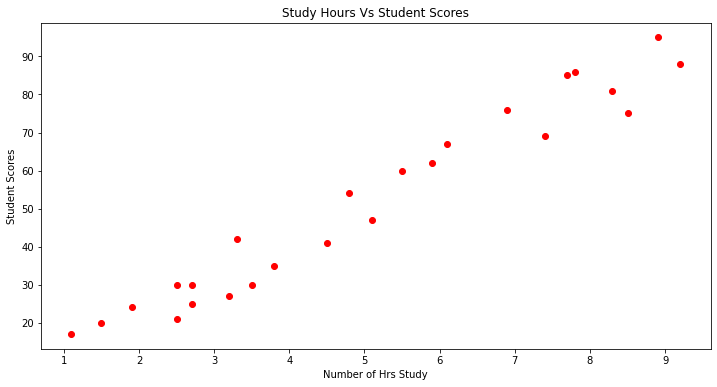

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(x='Hours',y='Scores',data=data,color='red')
plt.xlabel('Number of Hrs Study')
plt.ylabel('Student Scores')
plt.title('Study Hours Vs Student Scores')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Preparing the data

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
LR= LinearRegression()  
LR.fit(x_train, y_train) 

print("Training Complete.")

Training Complete.


## Draw predict value through line equation

In [12]:
LR.coef_

array([9.91065648])

In [13]:
LR.intercept_

2.018160041434662

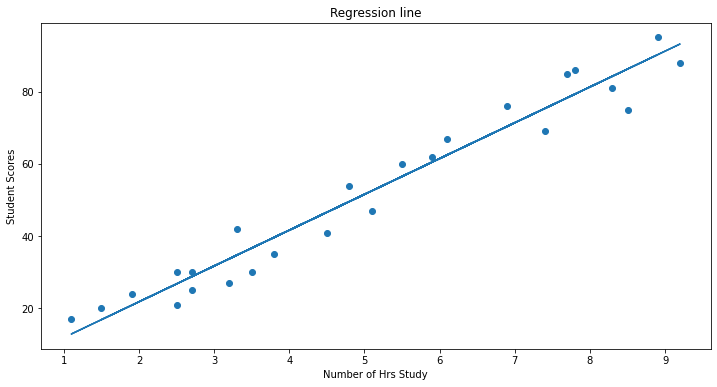

In [14]:
# Plotting the regression line
line =LR.coef_*x+LR.intercept_

# Plotting for the test data
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.plot(x, line);
plt.title('Regression line')
plt.xlabel('Number of Hrs Study')
plt.ylabel('Student Scores')
plt.show()

## Making Prediction 

In [15]:
print(x_test)
y_pred=LR.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
df=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Task perform

In [18]:
hrs=[[9.25]]
result=LR.predict(hrs)
print(f"If a student will study for {hrs}, predicted score will be {result}")

If a student will study for [[9.25]], predicted score will be [93.69173249]


## Evaluating the model

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


####  So, WE Predict the percentage of an student based on the no. of study hours